In [4]:
from skimage.feature import graycomatrix, graycoprops

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import cv2
from PIL import Image
from torchvision import transforms as T
from torchvision.transforms import v2
import re
from PIL import Image
from scipy import ndimage
import skimage.morphology as morpho
import seaborn as sns

# Segmentation

In [165]:
def get_image_pairs(directory: str, seg_only = False):
    image_files = sorted(glob.glob(f'{directory}/*.jpg'))
    
    dataset = []
    for img_file in image_files:
        base_name = os.path.splitext(img_file)[0]  # Get the base name of the image file
        seg_file = f'{base_name}_seg.png'  # Construct the name of the segmentation file
        
        if seg_only:
            if os.path.exists(seg_file):  # Check if the segmentation file exists
                dataset.append((img_file, seg_file))
                
        else:
            if os.path.exists(seg_file):  # Check if the segmentation file exists
                dataset.append((img_file, seg_file))
            else:
                dataset.append((img_file, None))
    
    return dataset

In [9]:
file = get_image_pairs('Dataset/Train')
print("total training files : ",len(file))
file = get_image_pairs('Dataset/Test')
print("total test files : ",len(file))
file = get_image_pairs('Dataset/Train', seg_only=True)
print("total training files with segmentation : ",len(file))
file = get_image_pairs('Dataset/Test', seg_only=True)
print("total test files with segmentation : ",len(file))

total training files :  18998
total test files :  6333
total training files with segmentation :  1945
total test files with segmentation :  648


In [4]:
image_files = sorted(glob.glob(f'{"Dataset/Train"}/*.jpg'))
mask_file = sorted(glob.glob(f'{"Dataset/Train"}/*.png'))
print(len(image_files) + len(mask_file))

# img = image_files[1]
# print(os.path.splitext(img)[0][:-3])

20943


In [3]:
image_files = sorted(glob.glob(f'{"Dataset/Train"}/*.jpg'))
print(len(image_files))
image_files = get_image_pairs("Dataset/Train_segmentation")
print(len(image_files))

18113
20132


In [5]:
file = get_image_pairs('Dataset/Train')
maxW = 0
maxH = 0
for i in range(len(file)):
    img = cv2.imread(file[i][0])
    
    if img.shape[0] > maxW:
        maxW = cv2.imread(file[i][0]).shape[0]
    
    if img.shape[1] > maxH:
        maxH = img.shape[1]

In [6]:
maxW, maxH

(512, 512)

In [7]:
def extract_number_from_filename(filename):
        number = re.findall(r'\d+', filename)[0]
        return number

filename = "ISIC_0000100.jpg"
number = extract_number_from_filename(filename)
print(number)

0000100


In [4]:
file = get_image_pairs('Dataset/Train', seg_only = True)
print(len(file))
for i in range (len(file)):
    img = cv2.imread(file[i][0])
    img_seg = cv2.imread(file[i][1])
    
    MAXSIZE = 512
    padding1H = MAXSIZE - img.shape[0]
    padding2H = padding1H // 2 if padding1H % 2 == 0 else padding1H // 2 + 1
    padding1H = padding1H // 2
    
    padding1W = MAXSIZE - img.shape[1]
    padding2W = padding1W // 2 if padding1W % 2 == 0 else padding1W // 2 + 1
    padding1W = padding1W // 2
    
    img = cv2.copyMakeBorder((img), padding1H, padding2H, padding1W, padding2W, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    cv2.imwrite(f'Dataset/Train_segmentation/ISIC_{i}.jpg', img)
    
    img_seg = cv2.copyMakeBorder((img_seg), padding1H, padding2H, padding1W, padding2W, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    cv2.imwrite(f'Dataset/Train_segmentation/ISIC_{i}_seg.jpg', img_seg)

1945


KeyboardInterrupt: 

In [308]:
file = get_image_pairs('Dataset/Test', seg_only = True)
print(len(file))
for i in range (len(file)):
    img = cv2.imread(file[i][0])
    img_seg = cv2.imread(file[i][1])
    
    MAXSIZE = 512
    padding1H = MAXSIZE - img.shape[0]
    padding2H = padding1H // 2 if padding1H % 2 == 0 else padding1H // 2 + 1
    padding1H = padding1H // 2
    
    padding1W = MAXSIZE - img.shape[1]
    padding2W = padding1W // 2 if padding1W % 2 == 0 else padding1W // 2 + 1
    padding1W = padding1W // 2
    
    img = cv2.copyMakeBorder((img), padding1H, padding2H, padding1W, padding2W, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    cv2.imwrite(f'Dataset/Test_seg/img_{i}.jpg', img)
    
    img_seg = cv2.copyMakeBorder((img_seg), padding1H, padding2H, padding1W, padding2W, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    cv2.imwrite(f'Dataset/Test_seg/img_{i}_seg.jpg', img_seg)

648


### Dataset for segmentation

In [24]:
image_files = sorted(glob.glob(f'{"Dataset/Train"}/*.jpg'))
mask_file = sorted(glob.glob(f'{"Dataset/Train"}/*.png'))

for i in range (len(image_files)):
    img = cv2.imread(image_files[i])
    number = extract_number_from_filename(image_files[i].split('/')[-1])
    
    MAXSIZE = 512
    padding1H = MAXSIZE - img.shape[0] 
    padding2H = padding1H // 2 if padding1H % 2 == 0 else padding1H // 2 + 1
    padding1H = padding1H // 2
    
    padding1W = MAXSIZE - img.shape[1]
    padding2W = padding1W // 2 if padding1W % 2 == 0 else padding1W // 2 + 1
    padding1W = padding1W // 2
    
    img = cv2.copyMakeBorder((img), padding1H, padding2H, padding1W, padding2W, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    cv2.imwrite(f'Dataset/Train_segmentation2/ISIC_{number}.jpg', img)
    
for i in range(len(mask_file)):
    img_seg = cv2.imread(mask_file[i])
    number = extract_number_from_filename(mask_file[i].split('/')[-1])
    
    MAXSIZE = 512
    padding1H = MAXSIZE - img_seg.shape[0] 
    padding2H = padding1H // 2 if padding1H % 2 == 0 else padding1H // 2 + 1
    padding1H = padding1H // 2
    
    padding1W = MAXSIZE - img_seg.shape[1]
    padding2W = padding1W // 2 if padding1W % 2 == 0 else padding1W // 2 + 1
    padding1W = padding1W // 2
    
    
    img_seg = cv2.copyMakeBorder((img_seg), padding1H, padding2H, padding1W, padding2W, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    cv2.imwrite(f'Dataset/Train_segmentation2/ISIC_{number}_seg.png', img_seg)

In [25]:
image_files = sorted(glob.glob(f'{"Dataset/Test"}/*.jpg'))
mask_file = sorted(glob.glob(f'{"Dataset/Test"}/*.png'))

for i in range (len(image_files)):
    img = cv2.imread(image_files[i])
    number = extract_number_from_filename(image_files[i].split('/')[-1])
    
    MAXSIZE = 512
    padding1H = MAXSIZE - img.shape[0] 
    padding2H = padding1H // 2 if padding1H % 2 == 0 else padding1H // 2 + 1
    padding1H = padding1H // 2
    
    padding1W = MAXSIZE - img.shape[1]
    padding2W = padding1W // 2 if padding1W % 2 == 0 else padding1W // 2 + 1
    padding1W = padding1W // 2
    
    img = cv2.copyMakeBorder((img), padding1H, padding2H, padding1W, padding2W, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    cv2.imwrite(f'Dataset/Test_segmentation2/ISIC_{number}.jpg', img)
    
for i in range(len(mask_file)):
    img_seg = cv2.imread(mask_file[i])
    number = extract_number_from_filename(mask_file[i].split('/')[-1])
    
    MAXSIZE = 512
    padding1H = MAXSIZE - img_seg.shape[0] 
    padding2H = padding1H // 2 if padding1H % 2 == 0 else padding1H // 2 + 1
    padding1H = padding1H // 2
    
    padding1W = MAXSIZE - img_seg.shape[1]
    padding2W = padding1W // 2 if padding1W % 2 == 0 else padding1W // 2 + 1
    padding1W = padding1W // 2
    
    
    img_seg = cv2.copyMakeBorder((img_seg), padding1H, padding2H, padding1W, padding2W, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    cv2.imwrite(f'Dataset/Test_segmentation2/ISIC_{number}_seg.png', img_seg)

In [6]:
file = get_image_pairs('Dataset/Test')
for i in range (len(file)):
    img = cv2.imread(file[i][0])
    
    number = extract_number_from_filename(file[i][0].split('/')[-1])
    
    MAXSIZE = 512
    padding1H = MAXSIZE - img.shape[0] 
    padding2H = padding1H // 2 if padding1H % 2 == 0 else padding1H // 2 + 1
    padding1H = padding1H // 2
    
    padding1W = MAXSIZE - img.shape[1]
    padding2W = padding1W // 2 if padding1W % 2 == 0 else padding1W // 2 + 1
    padding1W = padding1W // 2
    
    img = cv2.copyMakeBorder((img), padding1H, padding2H, padding1W, padding2W, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    cv2.imwrite(f'Dataset/Test_segmentation/img_{number}.jpg', img)
    
    if file[i][1] is not None:
        img_seg = cv2.imread(file[i][1])
        img_seg = cv2.copyMakeBorder((img_seg), padding1H, padding2H, padding1W, padding2W, cv2.BORDER_CONSTANT, value=[0, 0, 0])
        cv2.imwrite(f'Dataset/Test_segmentation/img_{number}_seg.jpg', img_seg)

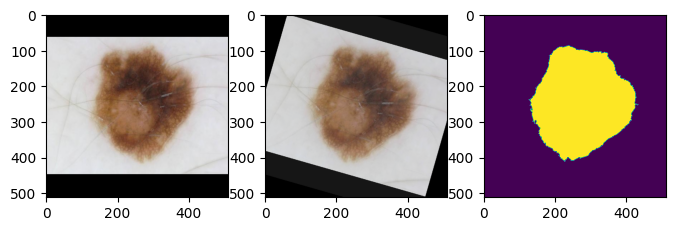

In [62]:
aug_data = v2.Compose([
        v2.RandomHorizontalFlip(p=0.5),
        v2.RandomVerticalFlip(p=0.5),
        v2.RandomRotation(degrees=20),
    ])
trans = v2.ColorJitter(brightness=[0.8, 1.2], contrast=[0.7,1], saturation=[0.7, 1])

img = Image.open("Dataset/Train_classification/ISIC_0000003.jpg")
img_seg = Image.open("Dataset/Train_classification/ISIC_0000003_seg.png")

trans_img, img_seg = aug_data(trans(img), img_seg)

fig,ax = plt.subplots(1, 3, figsize=(8, 8))
ax[0].imshow(img)
ax[1].imshow(trans_img)
img.save("test.jpg")
# print(np.array(img_seg).shape)
img_seg = np.array(img_seg)
ax[2].imshow(img_seg[:,:,1])

# Visualizing the segmentation

18998


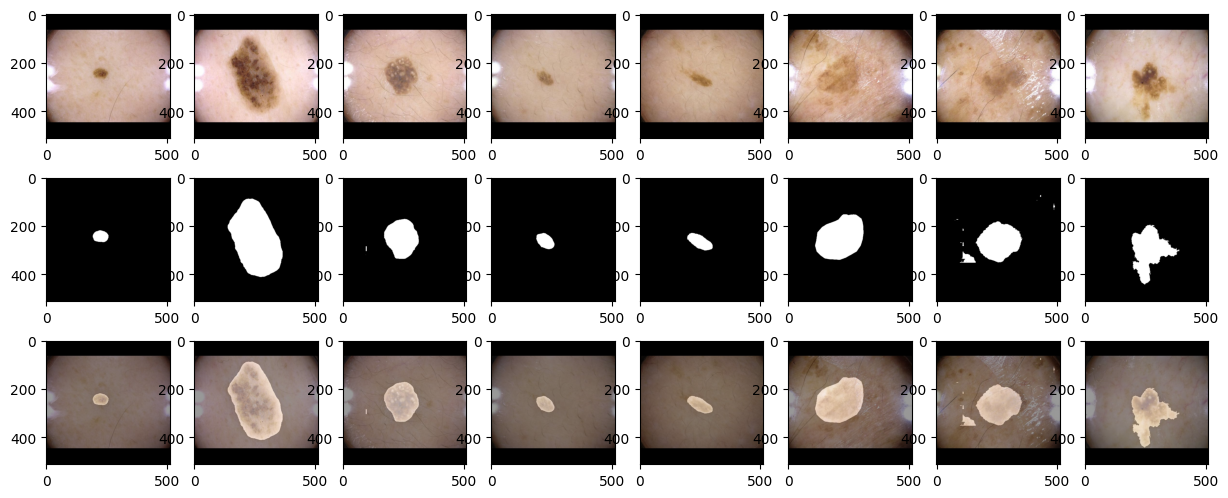

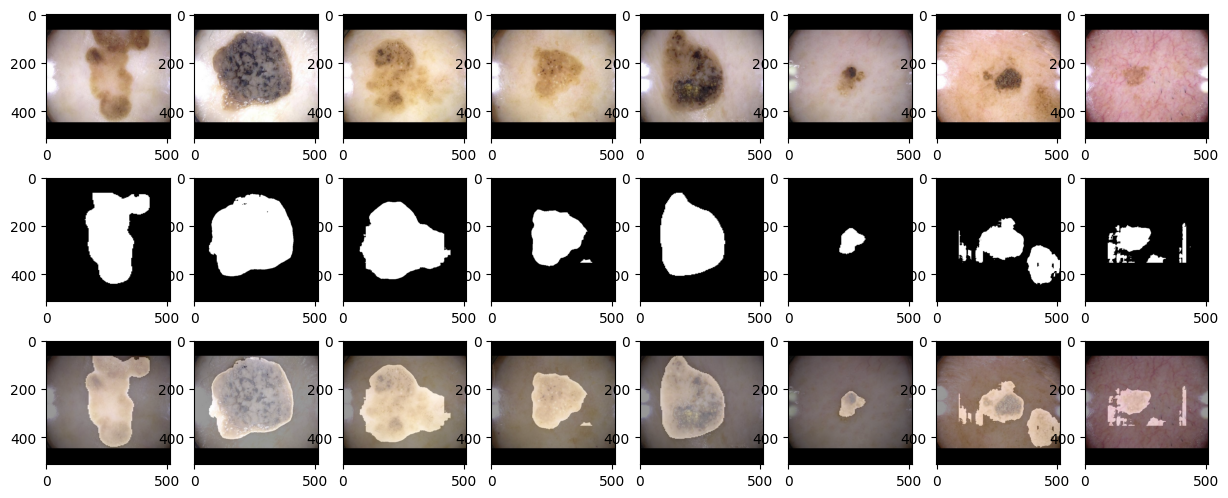

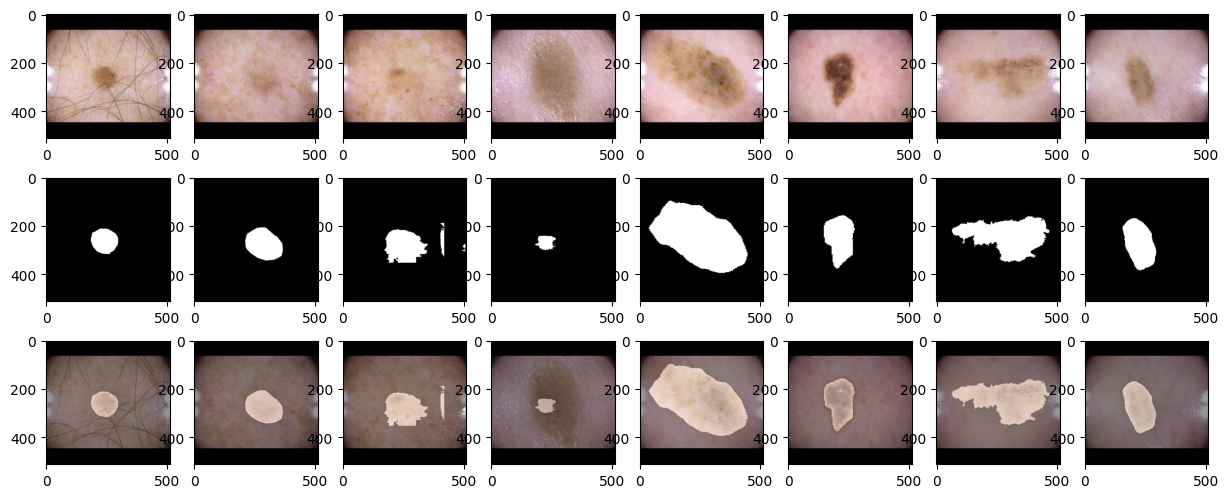

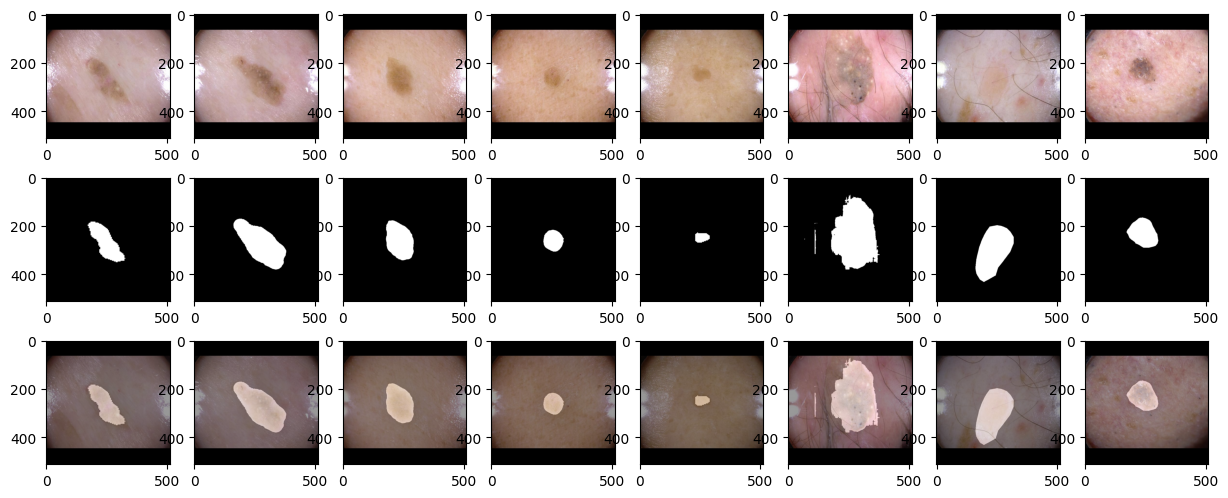

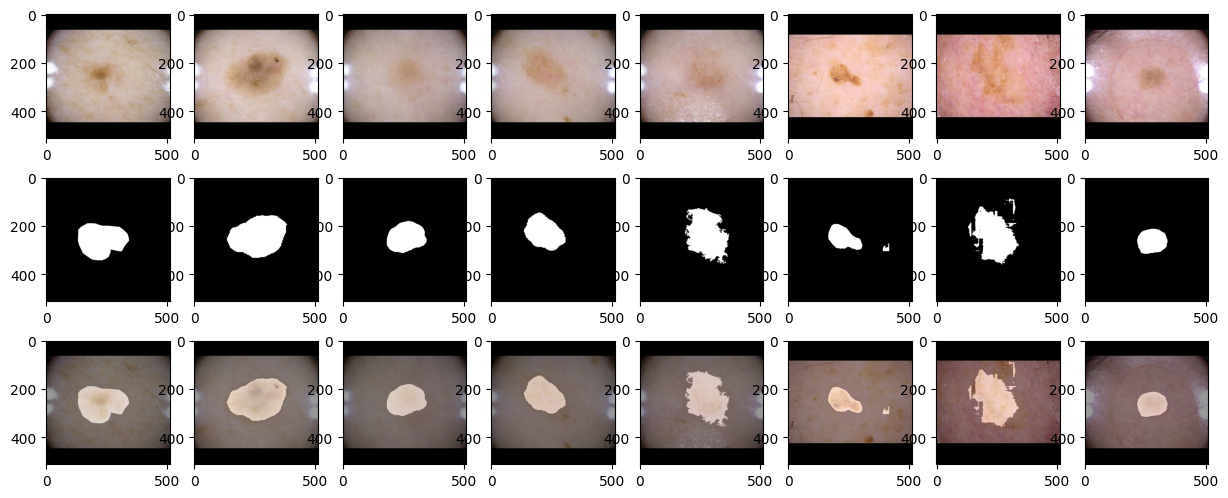

In [15]:
segmented_file = get_image_pairs("Dataset/Train_classification/")
print(len(segmented_file))

for i in range(215,220):
    fig, ax = plt.subplots(3, 8, figsize=(15, 6))
    for j in range (8*i, 8 * (i+1)):
        img = cv2.imread(segmented_file[j][0])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        seg = cv2.imread(segmented_file[j][1])
        feature_image = cv2.addWeighted(img, 0.6, seg, 0.4, 0)
        
        ax[0, j % 8].imshow(img)
        ax[1 ,j % 8].imshow(seg)
        ax[2, j % 8].imshow(feature_image)

### Features

On a besoin de nettoyer les masques en gardant seulement le plus grand contour. De plus, il faut remplir les trous dans les masques.

In [167]:
def processing_mask(mask):
    """
    This function processes the mask image by:
    1. Performing connected components analysis to find the largest component
    2. Performing morphological closing to fill the holes in the mask
    3. Filling the holes in the mask
    
    return 512x512 image value in [0,1]
    """    
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask[:,:,0], connectivity=8)

    # Find the label of the largest component (excluding background)
    largest_label = np.argmax(stats[1:, cv2.CC_STAT_AREA]) + 1

    # Create a mask for the largest component
    largest_component_mask = np.uint8(labels == largest_label) * 255

    # Perform morphological closing to fill the holes on the copy
    filled_mask = cv2.morphologyEx(largest_component_mask, cv2.MORPH_CLOSE, morpho.disk(10))
    
    filled_mask = ndimage.binary_fill_holes(filled_mask).astype(np.uint8) 

    return filled_mask

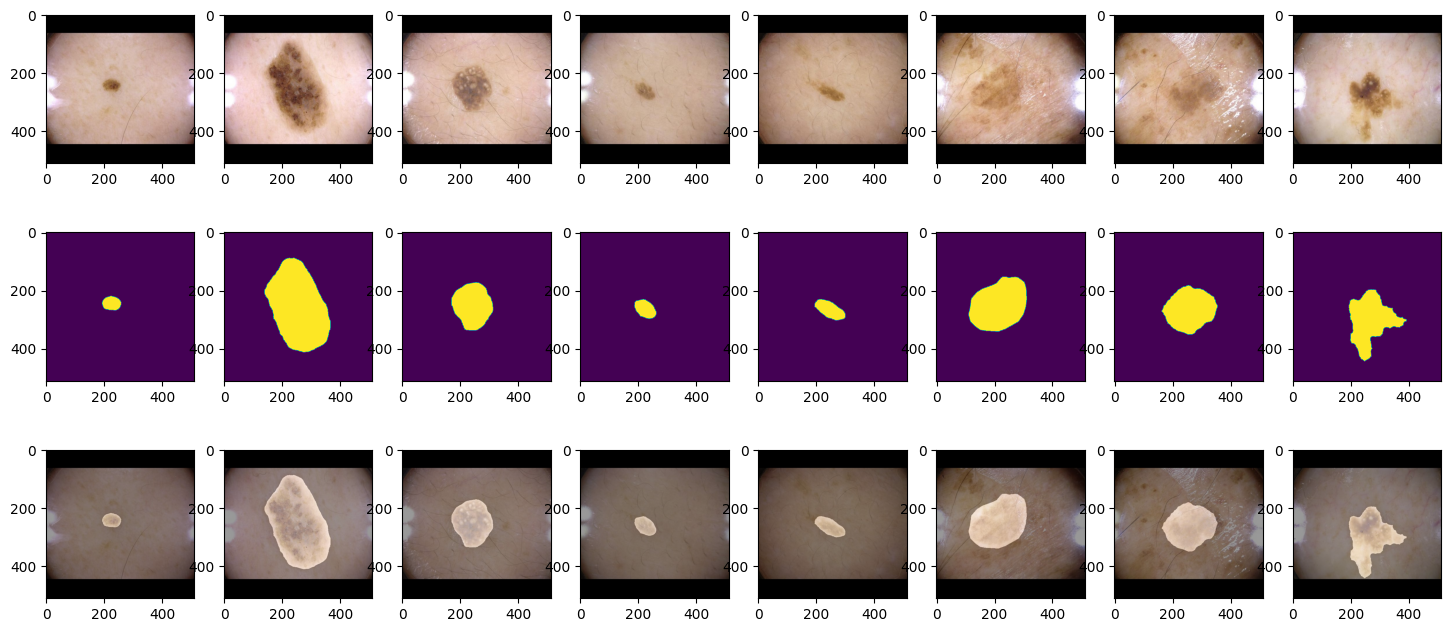

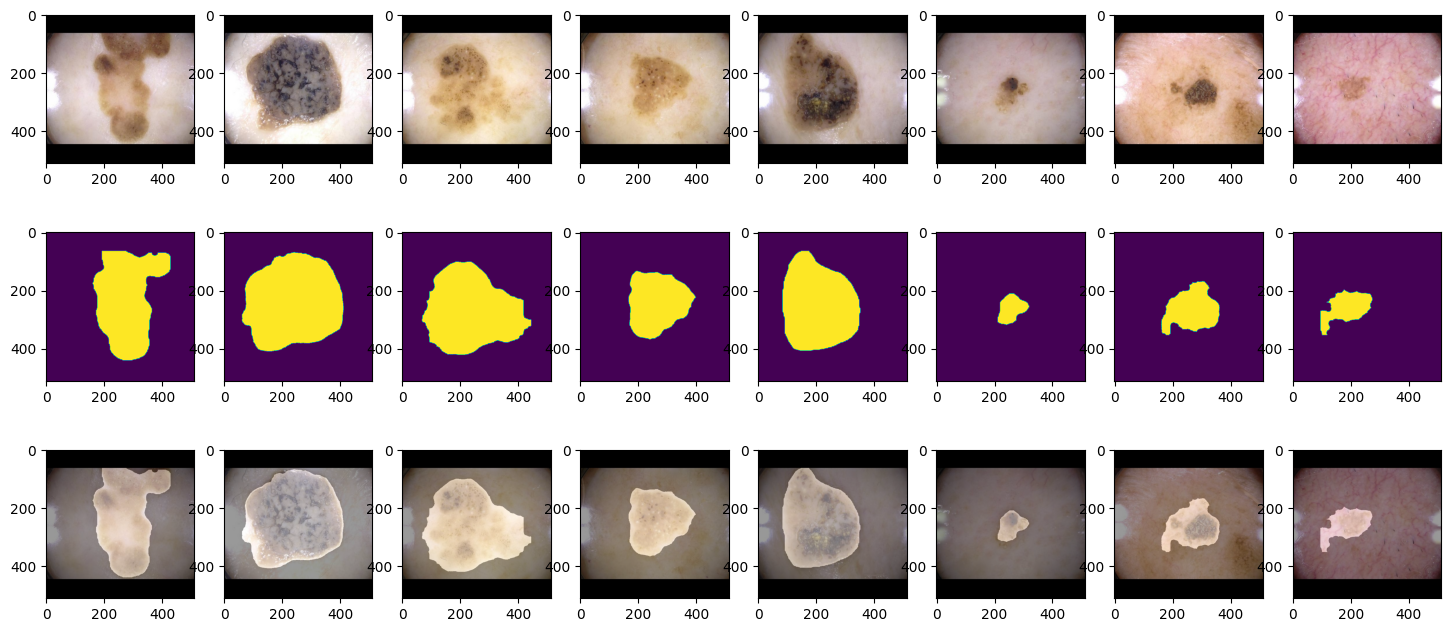

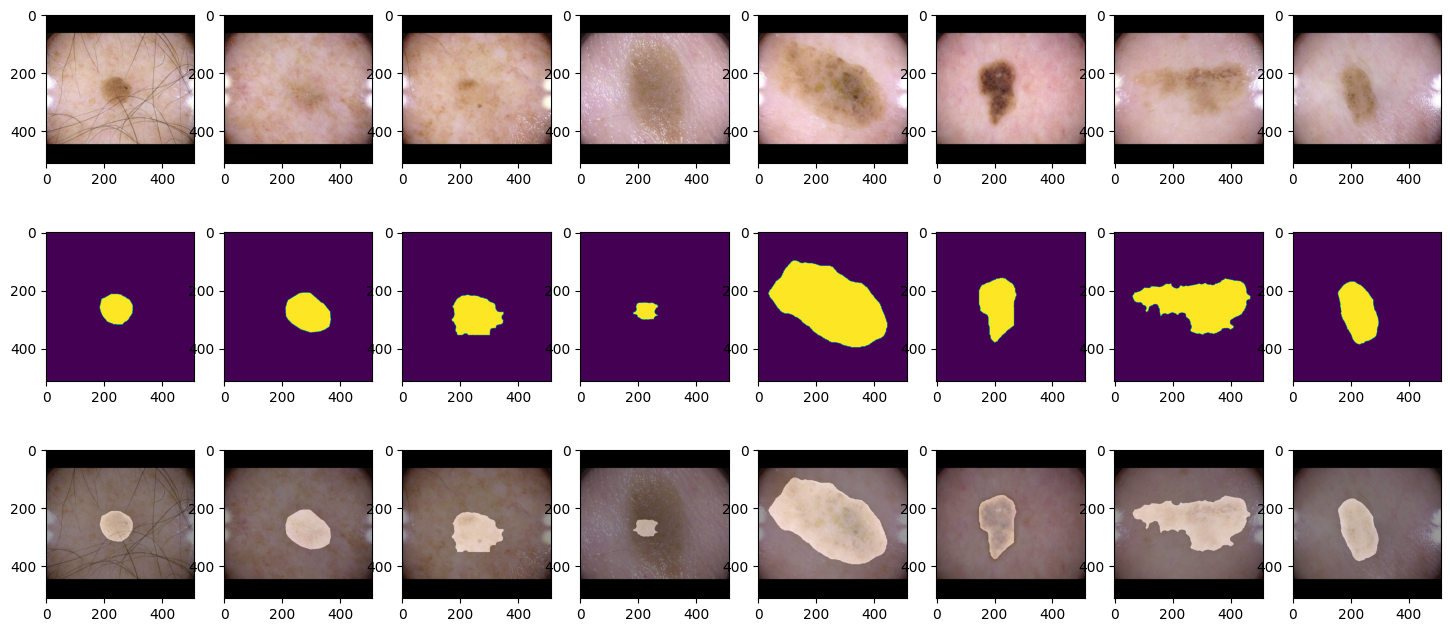

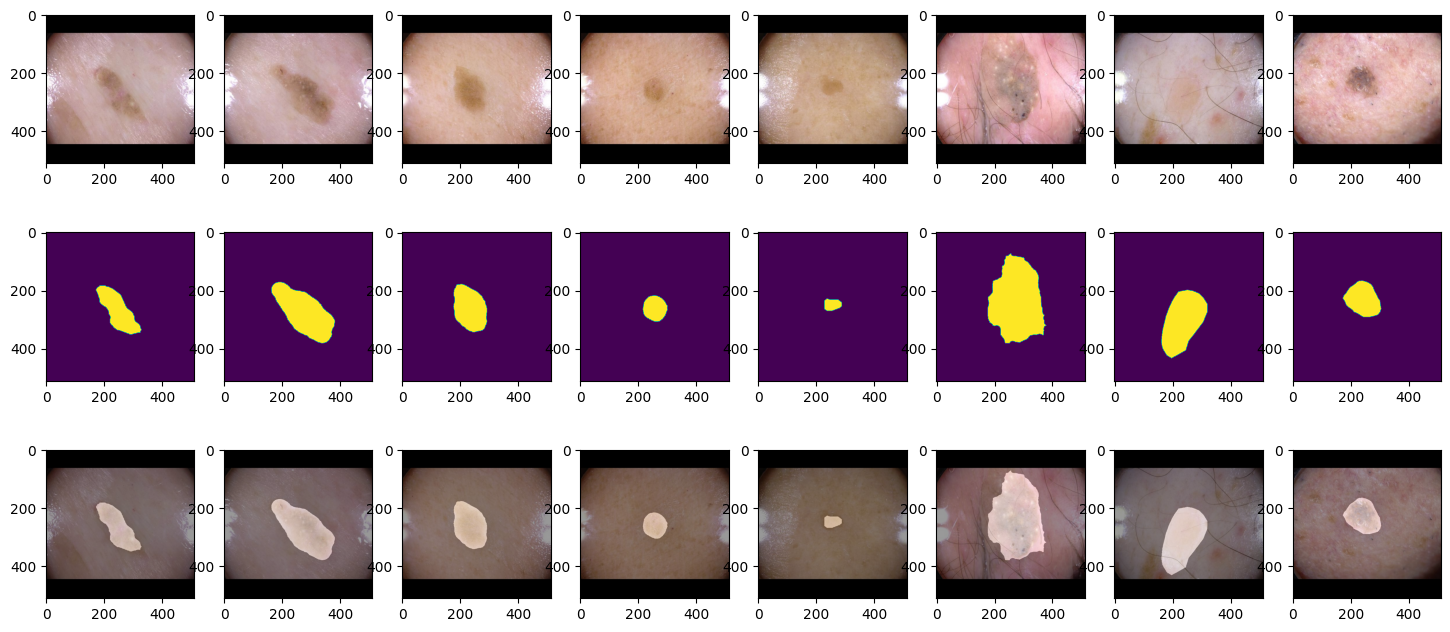

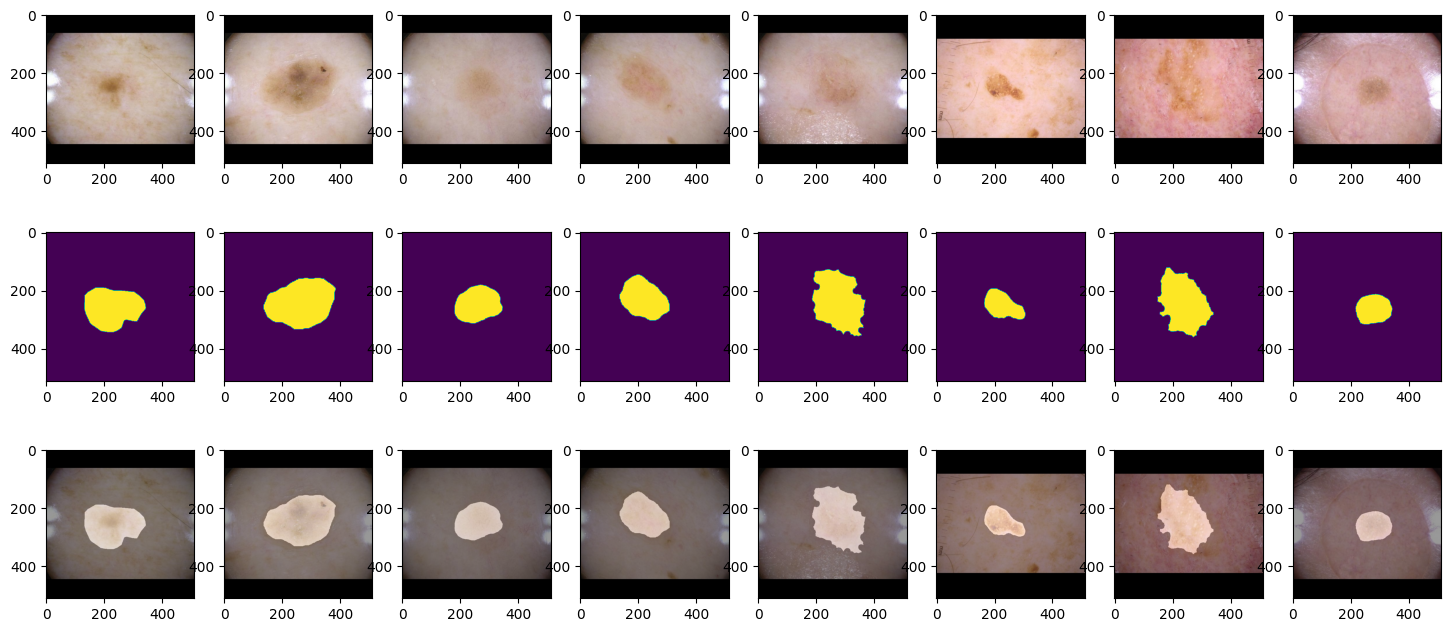

In [18]:
segmented_file = get_image_pairs("Dataset/Train_classification/")
for i in range(215,220):
    fig, ax = plt.subplots(3, 8, figsize=(18, 8))
    for j in range (8*i, 8 * (i+1)):
        img = cv2.imread(segmented_file[j][0])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        seg = cv2.imread(segmented_file[j][1])
        mask = processing_mask(seg)
        feature_image = cv2.addWeighted(img, 0.6, np.repeat(np.expand_dims(mask * 255, axis=2),3, axis=2), 0.4, 0)
        
        ax[0, j % 8].imshow(img)
        ax[1 ,j % 8].imshow(mask)
        ax[2, j % 8].imshow(feature_image)

In [181]:
def get_features(filename, test=False):
    """
    
    """
    if not test:
        img = cv2.imread('Dataset/Train_classification/' + filename + '.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        mask = cv2.imread('Dataset/Train_classification/' + filename + '_seg.png')
    else:
        img = cv2.imread('Dataset/Test_classification/' + filename + '.jpg')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        mask = cv2.imread('Dataset/Test_classification/' + filename + '_seg.png')
    
    area_total = np.sum(mask)
    
    if area_total < 100:
        return None
    else:
        mask = processing_mask(mask)
        
    # Assymmetry
    horizontal_flip = np.fliplr(mask)
    diff_horizontal = mask * (1-horizontal_flip)
    
    vertical_flip = np.flipud(mask)
    diff_vertical = mask * (1-vertical_flip)
    
    diff_horizontal_area = np.count_nonzero(diff_horizontal)
    diff_vertical_area = np.count_nonzero(diff_vertical)
    
    asymm_idx = 0.5 * ((diff_horizontal_area / area_total) + (diff_vertical_area / area_total))
    
    # Border irregularity
    edges = cv2.Canny(mask, 1,2) // 255
    perimeter = np.sum(edges)
    border_irregularity = perimeter / (2 * np.sqrt(np.pi * area_total))
    
    # Color
    R = img[:,:,0] * mask
    G = img[:,:,1] * mask
    B = img[:,:,2] * mask
    
    var_R = np.std(R / R.max()) 
    mean_R = np.mean(R[R != 0])
    mean_G = np.mean(G[G != 0])
    mean_B = np.mean(B[B != 0])
    
    # Texture
    distances = [50] # Offset
    angles = [np.pi/2]  #
    img = np.clip(img, 0, 254)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    glcm = graycomatrix(img, distances=distances, angles=angles,levels=255)
    
    contrast = graycoprops(glcm, 'contrast')
    dissimilarity = graycoprops(glcm, 'dissimilarity')
    homogeneity = graycoprops(glcm, 'homogeneity')
    correlation = graycoprops(glcm, 'correlation')
    
    return asymm_idx, border_irregularity, var_R, mean_R, mean_G, mean_B, contrast[0][0], dissimilarity[0][0], homogeneity[0][0], correlation[0][0]

# Data cleaning

In [244]:
train = pd.read_csv("Dataset/metadataTrain.csv")
df_test = pd.read_csv("Dataset/metadataTest.csv")

print(train.head())
print()
print(train.info())
# unique_values = train_X['POSITION'].unique()

# Print or use the unique values as needed

             ID  CLASS     SEX   AGE         POSITION
0  ISIC_0028766      2    male  30.0              NaN
1  ISIC_0071222      8    male  85.0  lower extremity
2  ISIC_0069434      3    male  85.0        head/neck
3  ISIC_0062098      1    male  55.0        head/neck
4  ISIC_0057224      8  female  45.0  lower extremity

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18998 entries, 0 to 18997
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        18998 non-null  object 
 1   CLASS     18998 non-null  int64  
 2   SEX       18714 non-null  object 
 3   AGE       18674 non-null  float64
 4   POSITION  17028 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 742.2+ KB
None


In [245]:
# Looking for missing values
print(pd.DataFrame(train.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(5))
print(pd.DataFrame(df_test.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(5))

           sum
POSITION  1970
AGE        324
SEX        284
ID           0
CLASS        0
          sum
POSITION  661
AGE       113
SEX       100
ID          0


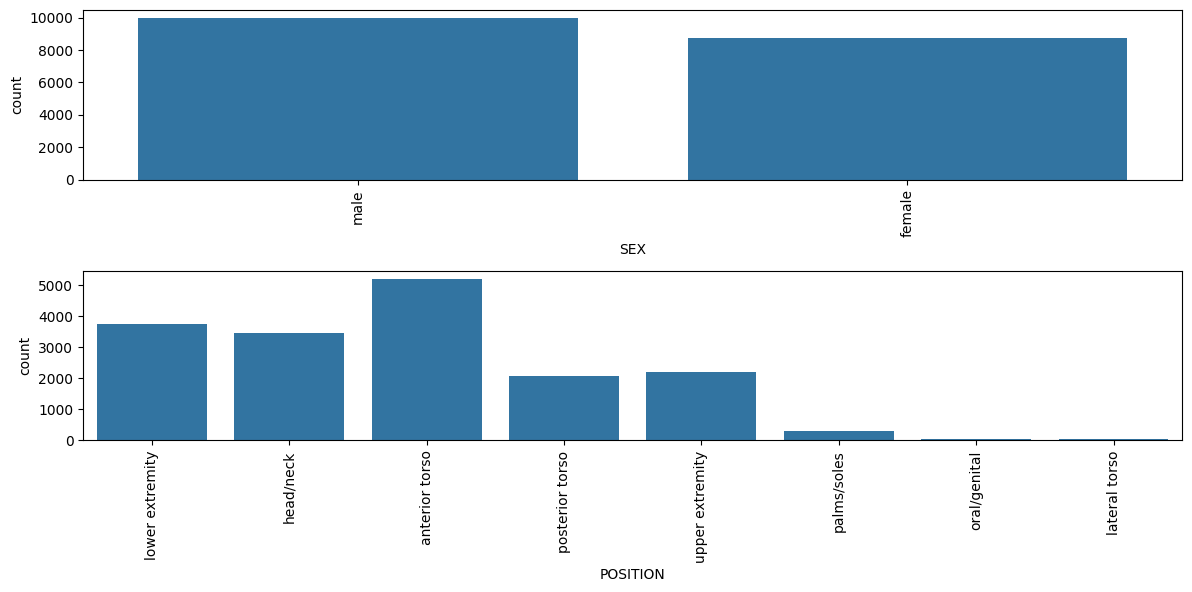

In [246]:
fig = plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
sns.countplot(x=train.SEX, data=train.dropna())
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.countplot(x=train.POSITION, data=train.dropna())
plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

In [247]:
train_count = train.groupby('POSITION')['ID'].nunique()
train_count

POSITION
anterior torso     5194
head/neck          3447
lateral torso        42
lower extremity    3738
oral/genital         46
palms/soles         292
posterior torso    2082
upper extremity    2187
Name: ID, dtype: int64

In [248]:
train_count = train.groupby('CLASS')['ID'].nunique()
train_count

CLASS
1    3391
2    9657
3    2492
4     650
5    1968
6     179
7     190
8     471
Name: ID, dtype: int64

In [249]:
#SEX
train["SEX"] = train["SEX"].fillna(train["SEX"].mode().iloc[0])
df_test["SEX"] = df_test["SEX"].fillna(df_test["SEX"].mode().iloc[0])
print(pd.DataFrame(train.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(5))

           sum
POSITION  1970
AGE        324
ID           0
CLASS        0
SEX          0


Enlever les dataset sans informations sur le SEX est pertinent puisque la plupart n'avait pas d'informaiton ni sur l'age ni sur la position.

In [250]:
train["AGE"] = train["AGE"].fillna(train["AGE"].mean())
df_test["AGE"] = df_test["AGE"].fillna(df_test["AGE"].mean())

In [251]:
train["POSITION"] = train["POSITION"].fillna(train["POSITION"].mode().iloc[0])
df_test["POSITION"] = df_test["POSITION"].fillna(df_test["POSITION"].mode().iloc[0])
print(train.shape)

(18998, 5)


In [252]:
print(pd.DataFrame(train.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(5))

          sum
ID          0
CLASS       0
SEX         0
AGE         0
POSITION    0


In [253]:
# One hot encoding
train = pd.get_dummies(train, columns=['POSITION','SEX'])
df_test = pd.get_dummies(df_test, columns=['POSITION','SEX'])

In [254]:
new_columns = {'asymm_idx': np.nan, 'border_irregularity': np.nan, 'var_R': np.nan, 'mean_R': np.nan, 'mean_G': np.nan, 'mean_B': np.nan,
               'contrast': np.nan, 'dissimilarity': np.nan, 'homogeneity': np.nan, 'correlation': np.nan}

train = train.assign(**new_columns)
df_test = df_test.assign(**new_columns)

In [255]:
# Add features
train = train.reset_index(drop=True)
row_to_drop = []
for i in range(train.shape[0]):
    filename = train["ID"][i]
    feature = get_features(filename)
    if feature is not None:
        train.iloc[i, 13:] = feature
    else:
        row_to_drop.append(i)

train = train.drop(row_to_drop, axis=0)

train.head()
train.shape

(18857, 23)

In [256]:
train.columns

Index(['ID', 'CLASS', 'AGE', 'POSITION_anterior torso', 'POSITION_head/neck',
       'POSITION_lateral torso', 'POSITION_lower extremity',
       'POSITION_oral/genital', 'POSITION_palms/soles',
       'POSITION_posterior torso', 'POSITION_upper extremity', 'SEX_female',
       'SEX_male', 'asymm_idx', 'border_irregularity', 'var_R', 'mean_R',
       'mean_G', 'mean_B', 'contrast', 'dissimilarity', 'homogeneity',
       'correlation'],
      dtype='object')

In [262]:
df_test.columns

Index(['ID', 'AGE', 'POSITION_anterior torso', 'POSITION_head/neck',
       'POSITION_lateral torso', 'POSITION_lower extremity',
       'POSITION_oral/genital', 'POSITION_palms/soles',
       'POSITION_posterior torso', 'POSITION_upper extremity', 'SEX_female',
       'SEX_male', 'asymm_idx', 'border_irregularity', 'var_R', 'mean_R',
       'mean_G', 'mean_B', 'contrast', 'dissimilarity', 'homogeneity',
       'correlation'],
      dtype='object')

In [258]:
df_test = df_test.reset_index(drop=True)

row_drop = []
for i in range(df_test.shape[0]):
    filename = df_test["ID"][i]
    feature = get_features(filename, test = True)
    if feature is not None:
        df_test.iloc[i, 12:] = feature
    else:
        row_drop.append(i)

In [261]:
columns = ['asymm_idx','border_irregularity','var_R', 'mean_R','mean_G','mean_B','contrast','dissimilarity','homogeneity','correlation']
mean_values = df_test[columns].mean()
df_test[columns] = df_test[columns].fillna(mean_values)

In [263]:
print(pd.DataFrame(train.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(5))
print(pd.DataFrame(df_test.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(5))

               sum
ID               0
SEX_male         0
homogeneity      0
dissimilarity    0
contrast         0
               sum
ID               0
AGE              0
homogeneity      0
dissimilarity    0
contrast         0


In [264]:
from sklearn.preprocessing import RobustScaler

numerical_features = train.select_dtypes(include = ["float64"]).columns

rbs = RobustScaler()
train[numerical_features] = rbs.fit_transform(train[numerical_features])
train[numerical_features]
train.to_csv("Dataset/metadataTrainFeaturesScaled.csv", index=False)

df_test[numerical_features] = rbs.transform(df_test[numerical_features])

df_test.to_csv("Dataset/metadataTestFeaturesScaled.csv", index=False)

In [265]:
train.to_csv("Dataset/metadataTrainFeaturesScaled.csv", index=False)
df_test.to_csv("Dataset/metadataTestFeaturesScaled.csv", index=False)

# Classification

In [27]:
train = pd.read_csv("Dataset/metadataTrainFeaturesScaled.csv")
train_reduced = train.drop(["ID","SEX_female","POSITION_oral/genital","asymm_idx","homogeneity","correlation"], axis=1)

Test = pd.read_csv("Dataset/metadataTestFeaturesScaled.csv")
df_test, df_ID = Test.drop(["ID","SEX_female","POSITION_oral/genital","asymm_idx","homogeneity","correlation"], axis=1), Test["ID"]

In [14]:
# Calculate the correlation matrix
import seaborn as sns
numerical_features = train_reduced.select_dtypes(include = ["float64",'int64']).columns
corr = train_reduced[numerical_features].corr()

# Mask values where correlation is less than 0.7
masked_corr = corr.mask(np.abs(corr) <= 0.0) * corr.mask(np.abs(corr) >= 1)

# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(15, 15))

# First heatmap with all correlations
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True, ax=ax)

# Second heatmap with masked correlations greater than 0.7
sns.heatmap(masked_corr, cmap="Reds", annot=True, fmt=".2f", mask=masked_corr.isnull(), square=True, ax=ax)

plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, confusion_matrix
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

train_X, train_y = train_reduced.drop(["CLASS"], axis=1), train_reduced['CLASS']
X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size = 0.2, random_state = 42)

print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

# Scaler = StandardScaler()
# X_train[:, numerical_features] = Scaler.fit_transform(X_train[:, numerical_features])
# X_test[:, numerical_features] = Scaler.transform(X_test[:, numerical_features])
# df_test[:, numerical_features] = Scaler.transform(df_test[:, numerical_features])

X_train : (15085, 16)
X_test : (3772, 16)
y_train : (15085,)
y_test : (3772,)


In [16]:
import seaborn as sns
plt.figure()
sns.countplot(x=train.CLASS)

<Axes: xlabel='CLASS', ylabel='count'>

In [17]:
# from imblearn.over_sampling import SMOTE

# strategy = {1:4000, 2:9000, 3:4000, 4:4000, 5:4000, 6:4000, 7: 4000, 8: 4000}
# oversample = SMOTE(sampling_strategy=strategy)
# X_train, y_train = oversample.fit_resample(X_train, y_train)

In [18]:
import itertools
from sklearn.metrics import make_scorer
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
def weighted_categorization_scorer(true_labels, predicted_labels):
    # Initialize variables to store total accuracy and total weighted accuracy
    total_weighted_accuracy = 0.0
    weights = [0.7005531, 0.24592265, 0.95261733, 3.64804147, 1.20674543, 13.19375, 12.56547619, 5.04219745]
    
    # Iterate over each category
    for i in range(len(weights)):
        # Initialize variables to store category-specific accuracy and count
        category_accuracy = 0.0
        category_count = 0
        
        # Iterate over each sample
        for true_label, predicted_label in zip(true_labels, predicted_labels):
            # If the true label matches the category
            if true_label == i:
                category_count += 1
                # If the predicted label matches the true label
                if predicted_label == true_label:
                    category_accuracy += 1
        
        # Calculate category accuracy
        if category_count > 0:
            category_accuracy /= category_count
        
        # Calculate weighted category accuracy
        weighted_category_accuracy = category_accuracy * weights[i]
        
        # Accumulate total accuracy and total weighted accuracy
        total_weighted_accuracy += weighted_category_accuracy
    
    # Calculate overall accuracy and overall weighted accuracy
    overall_weighted_accuracy = total_weighted_accuracy / sum(weights)
    
    return overall_weighted_accuracy


weighted_scorer = make_scorer(weighted_categorization_scorer, greater_is_better=True)

Tous les hyperparamètre ont été testé sur le GPU.

## KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=8)

KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

overall_weighted_accuracy = weighted_categorization_scorer(y_test, y_pred)
print("Overall Weighted Accuracy:", overall_weighted_accuracy)

/Users/marc/opt/anaconda3/envs/AI/lib/python3.11/site-packages/threadpoolctl.py:1186: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


Overall Weighted Accuracy: 0.1851819602944654


## XGBoost

In [35]:
from xgboost import XGBClassifier
from sklearn.utils import class_weight

param_grid = {"max_depth": [15],
                "learning_rate": [0.01],
                "subsample": [0.8],
                "n_estimators": [200],
                }

y_train_shift = y_train - 1

class_weights = class_weight.compute_sample_weight('balanced', y_train_shift)

xgb = XGBClassifier()

grid_XBG = GridSearchCV(xgb, param_grid=param_grid, n_jobs=-1, cv=4, scoring=weighted_scorer, verbose=2)
grid_XBG.fit(X_train, y_train_shift, sample_weight=class_weights)

print("Best training Score: {}".format(grid_XBG.best_score_))
print("Best training params: {}".format(grid_XBG.best_params_))

best_estimator = grid_XBG.best_estimator_
y_pred = best_estimator.predict(X_test)
y_pred = y_pred + 1

overall_weighted_accuracy = weighted_categorization_scorer(y_test, y_pred)
print("Overall Weighted Accuracy:", overall_weighted_accuracy)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["1","2","3","4","5","6","7","8"], normalize=True,
                      title='Normalized confusion matrix')
plt.show()

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END learning_rate=0.01, max_depth=15, n_estimators=200, subsample=0.8; total time=  36.5s
[CV] END learning_rate=0.01, max_depth=15, n_estimators=200, subsample=0.8; total time=  36.7s
[CV] END learning_rate=0.01, max_depth=15, n_estimators=200, subsample=0.8; total time=  36.8s
[CV] END learning_rate=0.01, max_depth=15, n_estimators=200, subsample=0.8; total time=  37.6s
Best training Score: 0.3371139024540445
Best training params: {'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 200, 'subsample': 0.8}
Overall Weighted Accuracy: 0.3999540047113928
Normalized confusion matrix
[[0.5483871  0.2170088  0.07038123 0.02346041 0.10997067 0.01319648
  0.00146628 0.01612903]
 [0.09740603 0.78189518 0.04711488 0.00370566 0.04817364 0.01270513
  0.00635257 0.0026469 ]
 [0.07644628 0.05165289 0.70454545 0.05578512 0.05371901 0.01446281
  0.00413223 0.0392562 ]
 [0.09933775 0.02649007 0.31788079 0.37748344 0.1192053  0.0066225

## SVM

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[CV] END ...............................C=400.0, gamma=0.005; total time=  25.8s
[CV] END ...............................C=400.0, gamma=0.005; total time=  25.9s
[CV] END ...............................C=400.0, gamma=0.005; total time=  26.2s
[CV] END ...............................C=400.0, gamma=0.005; total time=  26.5s
Best training Score: 0.47008842425264274
Best training params: {'C': 400.0, 'gamma': 0.005}
Overall Weighted Accuracy: 0.4718981282459999
Normalized confusion matrix
[[0.45601173 0.13049853 0.06451613 0.06891496 0.14076246 0.06304985
  0.04398827 0.03225806]
 [0.12811011 0.6257279  0.04658549 0.01746956 0.06405506 0.06776072
  0.04023293 0.01005823]
 [0.03512397 0.02892562 0.3285124  0.20247934 0.06818182 0.08884298
  0.04338843 0.20454545]
 [0.05298013 0.01324503 0.0794702  0.58940397 0.05298013 0.06622517
  0.         0.14569536]
 [0.18844221 0.06030151 0.09045226 0.16834171 0.3241206  0.06281407
  0.03517588 0.07035176]
 [0.         0.07692308 0.1025641  0.        

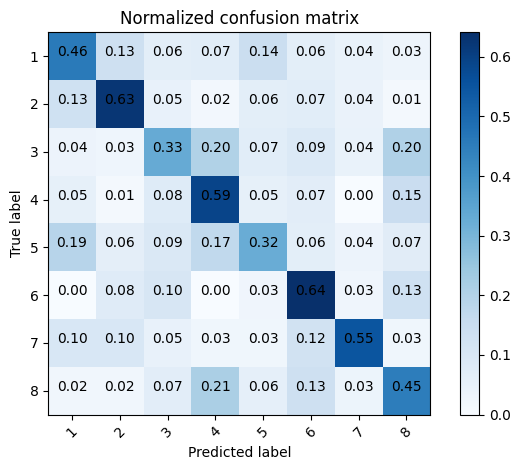

In [32]:
SVM = SVC(class_weight='balanced',kernel='rbf')
p_grid_nlsvm = {'C': [4e2],
                'gamma': [0.005]}

grid_nlsvm = GridSearchCV(SVM, p_grid_nlsvm, scoring=weighted_scorer, cv=4, n_jobs=-1, verbose=2)
grid_nlsvm.fit(X_train, y_train)
print("Best training Score: {}".format(grid_nlsvm.best_score_))
print("Best training params: {}".format(grid_nlsvm.best_params_))

best_estimator = grid_nlsvm.best_estimator_
y_pred = best_estimator.predict(X_test)

overall_weighted_accuracy = weighted_categorization_scorer(y_test, y_pred)
print("Overall Weighted Accuracy:", overall_weighted_accuracy)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["1","2","3","4","5","6","7","8"], normalize=True,
                      title='Normalized confusion matrix')
plt.show()

## Random Forest

Fitting 4 folds for each of 2 candidates, totalling 8 fits


[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=16, min_samples_split=25, n_estimators=1500; total time= 1.8min
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=16, min_samples_split=23, n_estimators=1500; total time= 1.8min
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=16, min_samples_split=23, n_estimators=1500; total time= 1.8min
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=16, min_samples_split=25, n_estimators=1500; total time= 1.8min
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=16, min_samples_split=23, n_estimators=1500; total time= 1.8min
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=16, min_samples_split=25, n_estimators=1500; total time= 1.8min
[CV] END bootstrap=False, max_depth=15, max_features=sqrt, min_samples_leaf=16, min_samples_split=23, n_estimators=1500; total time= 1.8min
[CV] END bootstrap=F

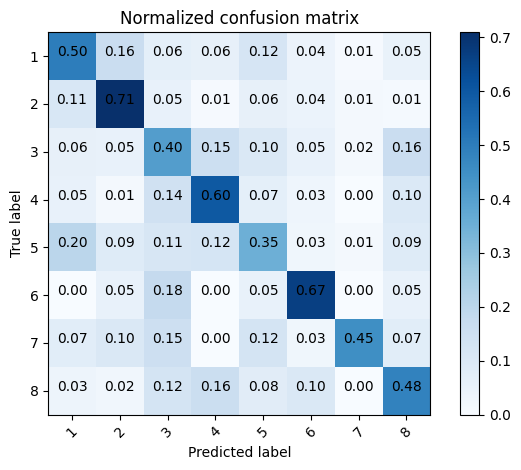

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight='balanced')
p_grid_rfc = {'bootstrap': [False],
                'max_depth': [15],
                'max_features': ['sqrt'],
                'min_samples_leaf': [16],
                'min_samples_split': [23,25],
                'n_estimators': [1500]}

grid_nlsvm = GridSearchCV(rfc, p_grid_rfc, scoring=weighted_scorer, cv=4, n_jobs=-1, verbose=2)
grid_nlsvm.fit(X_train, y_train)
print("Best training Score: {}".format(grid_nlsvm.best_score_))
print("Best training params: {}".format(grid_nlsvm.best_params_))

best_estimator = grid_nlsvm.best_estimator_
y_pred = best_estimator.predict(X_test)

overall_weighted_accuracy = weighted_categorization_scorer(y_test, y_pred)
print("Overall Weighted Accuracy:", overall_weighted_accuracy)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["1","2","3","4","5","6","7","8"], normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [34]:
feature_names = [feature for feature in X_train.columns if feature not in ["CLASS"]]

importances = best_estimator.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_estimator.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

Text(0, 0.5, 'Mean decrease in impurity')

In [36]:
submission = best_estimator.predict(df_test)
submission_df = pd.DataFrame({'ID': df_ID, 'CLASS': list(submission)})
submission_df.to_csv('/Users/marc/Desktop/IMA205/Kaggle/submission.csv', index=False)